<a href="https://colab.research.google.com/github/hmzashh/Deep-Learning/blob/main/Mushroom_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses a Multilayer Perceptron (MLP) neural network built with TensorFlow and Keras to classify mushrooms as "poisonous" or "edible" based on the UCI Mushroom Dataset, which contains over 8,000 samples with 22 descriptive features. After encoding categorical values and normalizing the data, the model was trained to achieve 100% accuracy on both training and test sets, with the ability to accurately predict new samples, making it an effective and straightforward model for automatic mushroom toxicity detection.

1. رفع البيانات إلى Google Colab


In [1]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms.csv to mushrooms.csv


✅ 2. استيراد المكتبات الأساسية



In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping



✅ 3. قراءة البيانات



In [3]:
df = pd.read_csv("mushrooms.csv")  # اسم الملف المرفوع
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


✅ 4. تجهيز الميزات (X) والتصنيفات (y)

*   على فرض ان الداتا لا تحتاج اي معالجة مسبقة كالقيم المفقودة والمتطرفة وان اصناف البيانات متوازن وغيرها من الامور




In [7]:
X = df.drop("class", axis=1).values  # كل الأعمدة ما عدا الهدف
y = df["class"].values               # العمود الهدف


✅ 5. تقسيم البيانات وتوحيد القيم

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✅ 6. بناء شبكة عصبية تقليدية


In [27]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])


✅ 7. تجميع النموذج



In [36]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy' if len(np.unique(y)) == 2 else 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


✅ 8. تدريب النموذج



In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# التدريب
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9972 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 2.5983e-06
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 2.3546e-06
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 2.1710e-06
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9976 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 2.8108e-06
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 2.8485e-06
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 4.1519e-06
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.6191e-04 - val_accuracy: 1.0000 - val_loss: 2.8642e-06
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

✅ 9. تقييم النموذج



In [38]:
loss, acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {acc:.4f}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.0654e-06
🎯 Test Accuracy: 1.0000


✅ 10. رسم الأداء



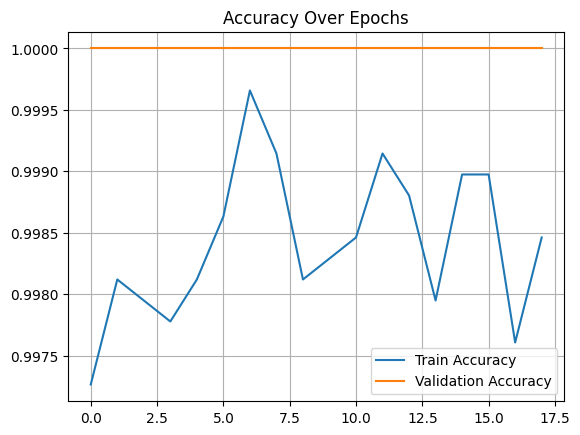

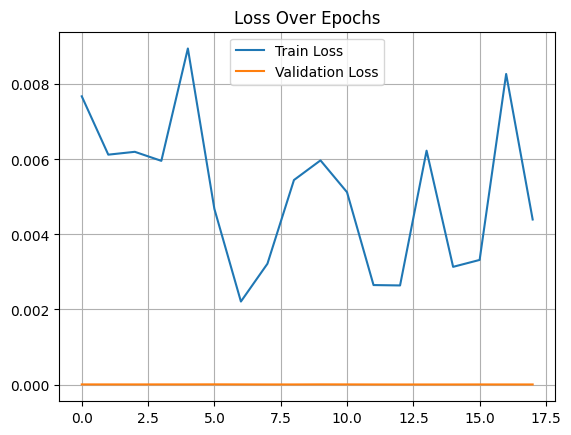

In [39]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.grid(True)
plt.show()
